[과제 연습 깃허브](https://github.com/HwangJae-won/Data_project_practice)  
[자전거 수요량 연습](https://velog.io/@juuurr/%EC%B7%A8%EC%A4%80-%EC%9D%BC%EA%B8%B0-%EB%8D%B0%EC%9D%B4%ED%84%B0-%EB%B6%84%EC%84%9D-%EA%B3%BC%EC%A0%9C-%ED%85%8C%EC%8A%A4%ED%8A%B8-%EC%A4%80%EB%B9%84-%EC%88%98%EC%9A%94%EB%9F%89-%EC%98%88%EC%B8%A11)  
[다른 과제 연습](https://emperor-one-data-study.tistory.com/70#google_vignette)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score

import statsmodels.api as sm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
import seaborn as sns
import datetime as dt
import os


import warnings
warnings.filterwarnings("ignore")

In [2]:
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

# checklist

- sklearn위주로 패키지 외우기
- 혹시 모르니 statsmodels도 같이 외우기

In [3]:
# logit = LogisticRegression()
# lin = LinearRegression()

# logi = sm.Logit.from_formula('', data=).fit()
# linee = sm.OLS.from_formula('',data=).fit()

# train_copy['target1'] = train_copy['근내환산점수'].apply(lambda x: 1 if 5 == x else 0)
'''df["새로만들 변수 이름"] = df["기존 변수 이름"].apply(lambda x: 변환할 값 if x == "기존 변수 값" else
                                        변환할 값2 if x == "다른 값" else 0)'''

'df["새로만들 변수 이름"] = df["기존 변수 이름"].apply(lambda x: 변환할 값 if x == "기존 변수 값" else\n                                        변환할 값2 if x == "다른 값" else 0)'

In [4]:
''' 메모장
1. groupby, pivot table 만들기 연습
2. 시각화 연습
3. 모델링 함수(하이퍼 파라미터 튜닝)
4. 원-핫 인코딩 같은 전처리 함수 연습
df.astype({'column': 'int'})
df_new = pd.get_dummies(df, columns=['column'])
df_new = pd.concat([df, pd.get_dummies(df['column'])], axis=1)
df['age2'] = df['age2'].fillna(df.groupby('sex')['age2'].transform('mean').apply(np.floor))
'''

" 메모장\n1. groupby, pivot table 만들기 연습\n2. 시각화 연습\n3. 모델링 함수(하이퍼 파라미터 튜닝)\n4. 원-핫 인코딩 같은 전처리 함수 연습\ndf.astype({'column': 'int'})\ndf_new = pd.get_dummies(df, columns=['column'])\ndf_new = pd.concat([df, pd.get_dummies(df['column'])], axis=1)\ndf['age2'] = df['age2'].fillna(df.groupby('sex')['age2'].transform('mean').apply(np.floor))\n"

# 코드 연습

## 타이타닉

In [5]:
df = sns.load_dataset('titanic')

In [6]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [7]:
print(f"{round((len(df[df['sex']=='female'])/len(df))*100,2)}%")
print(f"{round((len(df[df['sex']=='male'])/len(df))*100,2)}%")

35.24%
64.76%


In [8]:
print(df.groupby(['sex','class'])['age'].mean())

print(df.groupby(['sex','class'])['age'].agg(['mean','var']))

sex     class 
female  First     34.611765
        Second    28.722973
        Third     21.750000
male    First     41.281386
        Second    30.740707
        Third     26.507589
Name: age, dtype: float64
                    mean         var
sex    class                        
female First   34.611765  185.287955
       Second  28.722973  165.706451
       Third   21.750000  162.051980
male   First   41.281386  229.206594
       Second  30.740707  218.859292
       Third   26.507589  147.853777


In [9]:
df['age2'] = df['age'].copy()
print(df['age2'].isnull().sum())
print(df['age'].isnull().sum())

df['age2'] = df['age2'].fillna(df.groupby('sex')['age2'].transform('mean').apply(np.floor))

print(df[['age2','age']])

177
177
     age2   age
0    22.0  22.0
1    38.0  38.0
2    26.0  26.0
3    35.0  35.0
4    35.0  35.0
..    ...   ...
886  27.0  27.0
887  19.0  19.0
888  27.0   NaN
889  26.0  26.0
890  32.0  32.0

[891 rows x 2 columns]


In [10]:
df['sex2'] = df['sex'].copy()

print(df['sex2'].map({'male':0, 'female':1})[:5])
df['sex2'].head()

0    0
1    1
2    1
3    1
4    0
Name: sex2, dtype: int64


0      male
1    female
2    female
3    female
4      male
Name: sex2, dtype: object

In [11]:
label_encoder = LabelEncoder()
df['sex'] = label_encoder.fit_transform(df['sex'].astype(str))
df['embarked'] = label_encoder.fit_transform(df['embarked'])
df['class'] = label_encoder.fit_transform(df['class'].astype(str))
df['who'] = label_encoder.fit_transform(df['who'].astype(str))
df['adult_male'] = label_encoder.fit_transform(df['adult_male'].astype(str))
df['embark_town'] = label_encoder.fit_transform(df['embark_town'].astype(str))
df['alive'] = label_encoder.fit_transform(df['alive'].astype(str))

In [12]:
X = df[['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'class', 'who', 'adult_male', 'embark_town']]
y = df['survived']

In [13]:
# 데이터 분할 및 모델 학습
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=2024,
                                                    shuffle=True, stratify=y)

In [ ]:
rf = RandomForestClassifier(random_state=2024)

grid_p = {
    'n_estimators' : [50, 100, 150],
    'max_depth' : [5,10,15,20]
}

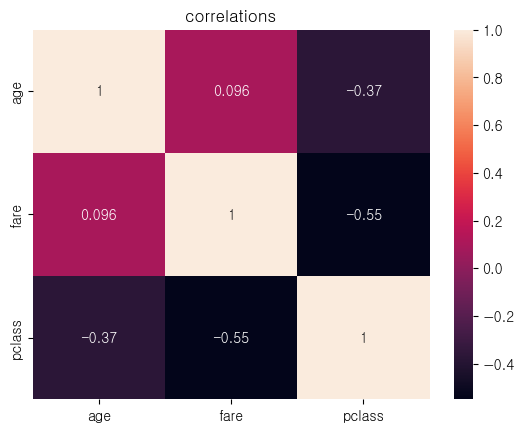

In [ ]:
cor_m = df[['age','fare','pclass']].corr()

plt.figure()
sns.heatmap(cor_m, annot=True)
plt.title('correlations')
plt.show()
%matplotlib inline